# The Fourier Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Theorems

The theorems of the Fourier transform relate basic time-domain operations to their equivalents in the Fourier domain. They are of use for the computation of Fourier transforms of signals composed from modified [standard signals](../continuous_signals/standard_signals.ipynb) and for the computation of the response of systems to an input signal. The theorems allow further to predict the consequences of modifying a signal or system by certain operations.

### Temporal Scaling Theorem

A signal $x(t)$ for which the Fourier transform $X(j \omega) = \mathcal{F} \{ x(t) \}$ is existing and known is given. The Fourier transform of the [temporally scaled signal](../continuous_signals/operations.ipynb#Temporal-Scaling) $x(a t)$ with $a \in \mathbb{R} \setminus \{0\}$ reads

\begin{equation}
\mathcal{F} \{ x(a t) \} = \frac{1}{|a|} \cdot X \left( \frac{j \omega}{a} \right)
\end{equation}

The Fourier transformation of a temporally scaled signal is given by inverse scaling of the Fourier transform of the unscaled signal and weighting with $\frac{1}{|a|}$. This relation is known as scaling theorem of the Fourier transform. It can be proven by introducing the scaled signal $x(a t)$ into the definition of the Fourier transformation together with the substitution $t' = a t$. For $a>0$ this reads

\begin{equation}
\begin{split}
\mathcal{F} \{ x(a t) \} &= \int_{-\infty}^{\infty} x(a t) e^{-j \omega t} dt \\
&= \frac{1}{a} \int_{-\infty}^{\infty} x(t') e^{-j \frac{\omega}{a} t'} dt' \\
&= \frac{1}{a} X \left( \frac{\omega}{a} \right)
\end{split}
\end{equation}



Note that the cases $a<0$ and $a>0$ have to be regarded separately.

**Example**

According to the scaling theorem and the [Fourier transform of the rectangular signal](definition.ipynb#Transformation-of-the-Rectangular-Signal) $\mathcal{F} \{ \text{rect}(t) \} = \text{sinc} \left( \frac{\omega}{2} \right)$, the transform of the scaled rectangular signal $\text{rect}(a t)$ is given as

\begin{equation}
\mathcal{F} \{ \text{rect}(a t) \} = \frac{1}{|a|} \cdot \text{sinc} \left( \frac{\omega}{2 a} \right)
\end{equation}

This can be confirmed by explicitly calculating the Fourier transformation of $\text{rect}(a t)$

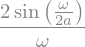

In [1]:
import sympy as sym
sym.init_printing()


def fourier_transform(x):
    return sym.integrals.transforms._fourier_transform(x, t, w, 1, -1, 'Fourier')


t, w = sym.symbols('t omega')
a = sym.symbols('a', positive=True)

x = sym.Heaviside(t + sym.S.Half/a) - sym.Heaviside(t - sym.S.Half/a)
X = fourier_transform(x)
X

For illustration both the signal $x(t)$ and its Fourier transform $X(j \omega)$ are plotted for a specific value of $a$

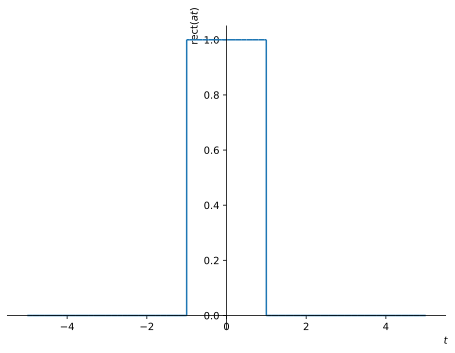

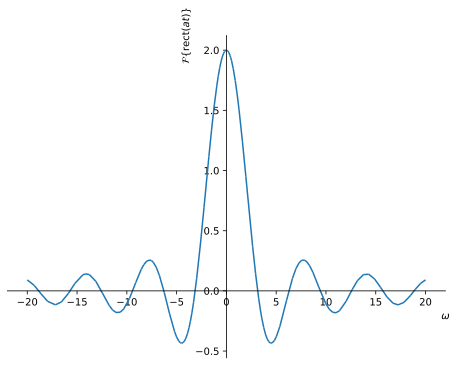

In [2]:
values = {a: 1/2}

sym.plot(x.subs(values), (t, -5, 5), xlabel=r'$t$',
         ylabel=r'$\mathrm{rect}(a t)$')
sym.plot(X.subs(values), (w, -20, 20), xlabel=r'$\omega$',
         ylabel=r'$\mathcal{F} \{ \mathrm{rect}(a t) \}$');

**Exercise**

* Change the width $1/a$ of the rectangular signal. How does its spectrum change?
* On a qualitative level, what happens when $1/a$ increases towards infinity?

### Convolution Theorem

The [convolution theorem](https://en.wikipedia.org/wiki/Convolution_theorem) states that the Fourier transform of the convolution of two signals $x(t)$ and $y(t)$ is equal to the scalar multiplication of their Fourier transforms $X(j \omega) = \mathcal{F} \{ x(t) \}$ and $Y(j \omega) = \mathcal{F} \{ y(t) \}$

\begin{equation}
\mathcal{F} \{ x(t) * y(t) \} = X(j \omega) \cdot Y(j \omega)
\end{equation}

The theorem can be proven by introducing the [definition of the convolution](../systems_time_domain/convolution.ipynb) into the [definition of the Fourier transform](definition.ipynb) and changing the order of integration

\begin{align}
\mathcal{F} \{ x(t) * y(t) \} &= \int_{-\infty}^{\infty} \left( \int_{-\infty}^{\infty} x(\tau) \cdot y(t-\tau) \; d \tau \right) e^{-j \omega t} \; dt \\
&= \int_{-\infty}^{\infty} \left( \int_{-\infty}^{\infty} y(t-\tau) \, e^{-j \omega t} \; dt \right) x(\tau) \; d\tau \\
&= Y(j \omega) \cdot \int_{-\infty}^{\infty} x(\tau) \, e^{-j \omega \tau} \; d \tau \\
&= Y(j \omega) \cdot X(j \omega)
\end{align}

under the assumption that both Fourier transforms $X(j \omega)$ and $Y(j \omega)$ exist.

The convolution theorem is very useful in the context of linear time-invariant (LTI) systems. The output signal $y(t)$ of an LTI system is given as the convolution of the input signal $x(t)$ with the impulse response $h(t)$. Hence, the signals and the system can be represented equivalently in the time and frequency domain

![Representation of an LTI system in the time- and Fourier-domain](LTI_system_Fourier_domain.png)


where $H(j \omega) = \mathcal{F} \{ h(t) \}$.
Calculation of the system response by transforming the problem into the Fourier domain can be beneficial since this replaces the evaluation of the convolution integral by a scalar multiplication. The (inverse) Fourier transforms are known for many signals or can be derived by applying the properties and theorems to standard signals and their transforms. This procedure simplifies the calculation of the system response significantly in many cases.

The convolution theorem can also be useful to derive an unknown Fourier transform. The key is here to express the signal as convolution of two other signals for which the Fourier transforms are known. This is illustrated by the following example.

#### Transformation of the triangular signal

A prominent example for the derivation of a Fourier transform by the convolution theorem is the [trianguar signal](https://en.wikipedia.org/wiki/Triangular_function)

\begin{equation}
\Lambda(t) = \begin{cases} 1- |t| & \text{for } |t| < 1 \\ 0 & \text{otherwise} \end{cases}
\end{equation}

which can be expressed as the convolution of two rectangular signals

\begin{equation}
\Lambda(t) = \text{rect}(t) * \text{rect}(t)
\end{equation}

Applying the convolution theorem yields

\begin{equation}
\mathcal{F} \{ \Lambda(t) \} = \text{sinc}\left( \frac{\omega}{2} \right) \cdot \text{sinc}\left( \frac{\omega}{2} \right) = \text{sinc}^2 \left( \frac{\omega}{2} \right)
\end{equation}

Both the signal and its transform are plotted for illustration

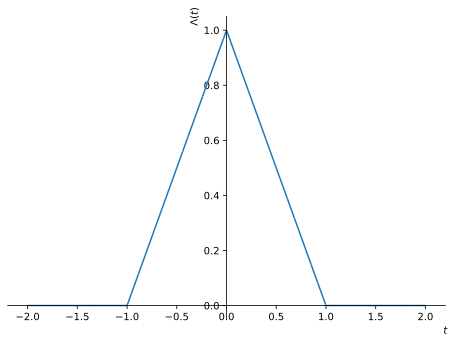

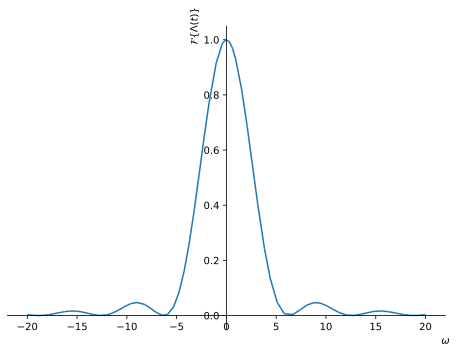

In [3]:
x = sym.Piecewise((1 - abs(t), abs(t) < 1), (0, True))
X = sym.sinc(w/2)**2

sym.plot(x, (t, -2, 2), xlabel=r'$t$', ylabel=r'$\Lambda(t)$')
sym.plot(X, (w, -20, 20), xlabel=r'$\omega$',
         ylabel=r'$\mathcal{F} \{ \Lambda(t) \}$');

**Exercise**

* Extend above example by temporal scaling of the triangular signal.
* Derive the Fourier transform of a trapezoidal shaped signal by convolving two rectangular signals of different width.

### Temporal Shift Theorem

The [temporal shift](../continuous_signals/operations.ipynb#Temporal-Shift) $x(t-\tau)$ of a signal $x(t)$ can be expressed by a convolution with a shifted Dirac impulse

\begin{equation}
x(t - \tau) = x(t) * \delta(t - \tau)
\end{equation}

for $\tau \in \mathbb{R}$. This follows from the sifting property of the Dirac impulse. Applying a Fourier transform to the left- and right-hand side and exploiting the convolution theorem yields

\begin{equation}
\mathcal{F} \{ x(t - \tau) \} = X(j \omega) \cdot e^{- j \omega \tau}
\end{equation}

where $X(j \omega) = \mathcal{F} \{ x(t) \}$. Note that $\mathcal{F} \{ \delta(t - \tau) \} = e^{- j \omega \tau}$ can be derived from the definition of the Fourier transform together with the sifting property of the Dirac impulse. Above relation is known as shift theorem of the Fourier transform.

Expressing $X(j \omega)$ by its absolute value $|X(j \omega)|$ and phase $\varphi(j \omega)$ results in

\begin{equation}
\mathcal{F} \{ x(t - \tau) \} = | X(j \omega) | \cdot e^{j (\varphi(j \omega) - \omega \tau)}
\end{equation}

Temporal shifting of a signal does not change the absolute value of its spectrum but it subtracts the linear contribution $\omega \tau$ from the phase of its spectrum.

### Differentiation Theorem

Let's assume a signal $x(t)$ whose temporal derivative $\frac{d x(t)}{dt}$ exists. Using the [derivation property of the Dirac impulse](../continuous_signals/standard_signals.ipynb#Dirac-Impulse), the derivative of the signal can be expressed by the convolution

\begin{equation}
\frac{d x(t)}{dt} = \frac{d \delta(t)}{dt} * x(t)
\end{equation}

Fourier transformation of the left- and right-hand side together with the [convolution theorem](#Convolution-Theorem) yields the Fourier transform of the derivative of $x(t)$

\begin{equation}
\mathcal{F} \left\{ \frac{d x(t)}{dt} \right\} = j \omega \cdot X(j \omega)
\end{equation}

where $X(j \omega) = \mathcal{F} \{ x(t) \}$. The Fourier transform $\mathcal{F} \{ \frac{d \delta(t)}{dt} \} = j \omega$ can be derived by applying the definition of the Fourier transform together with the derivation property of the Dirac impulse. Above result is known as differentiation theorem of the Fourier transform. It states that the differentiation of a signal in the time domain is equivalent to a multiplication of its spectrum by $j \omega$. Splitting the spectrum of the differentiated signal into its magnitude and phase

\begin{equation}
j \omega \cdot X(j \omega) = |\omega \, X(j \omega)| \; e^{j (\varphi(j \omega) + \frac{\pi}{2} )}
\end{equation}

reveals that differentiation of a signal results in an attenuation of the higher frequencies of its magnitude spectrum and adds a phase shift of $\frac{\pi}{2}$.

The main applications of the differentiation theorem are the transformation of differential equations or the derivation of transforms of signals which can be expressed as derivatives of other signals. This latter is illustrated by the following example. 

#### Transformation of the sign signal

The derivative of the [sign signal](../continuous_signals/standard_signals.ipynb#Sign-Signal) $\text{sgn}(t)$ [is given by the Dirac impulse](https://en.wikipedia.org/wiki/Sign_function#Properties)

\begin{equation}
\frac{d}{dt} \text{sgn}(t) = 2 \cdot \delta(t)
\end{equation}

Fourier transformation of the left- and right-hand side and application of the differentiation theorem yields

\begin{equation}
\mathcal{F} \{ \text{sgn}(t) \} = \frac{2}{j \omega}
\end{equation}

#### Transformation of the Heaviside signal

The transformation of the [Heaviside signal](../continuous_signals/standard_signals.ipynb#Heaviside-Signal) $\epsilon(t)$ is derived by expressing it in terms of the sign signal

\begin{equation}
\epsilon(t) = \frac{1}{2} ( \text{sgn}(t) + 1 )
\end{equation}

Using the linearity of the Fourier transform yields

\begin{equation}
\mathcal{F} \{ \epsilon(t) \} = \frac{1}{j \omega} + \pi \cdot \delta(\omega)
\end{equation}

The Fourier transformation of the Heaviside signal plays an important role in the context of [analytic signals](https://en.wikipedia.org/wiki/Analytic_signal) and their generation by the [Hilbert transform](https://en.wikipedia.org/wiki/Hilbert_transform).

### Integration Theorem

Let's assume a signal $x(t)$ for which the integral $\int_{-\infty}^{t} x(\tau) \; d\tau$ exists. The integration can be regarded as inverse operation to the temporal derivative. The integration can be represented as convolution with the rectangular signal $\epsilon(t)$ ([see integration theorem of the Laplace transform](../laplace_transform/theorems.ipynb#Integration-Theorem))

\begin{equation}
\int_{-\infty}^{t} x(\tau) \; d\tau = \int_{-\infty}^{\infty} x(\tau) \cdot \epsilon(t - \tau) \; d\tau = x(t) * \epsilon(t)
\end{equation}

Fourier transformation of the left- and right-hand side, application of the convolution theorem and using the Fourier transform of the Heaviside signal $\epsilon(t)$ yields the integration theorem of the Fourier transform

\begin{equation}
\mathcal{F} \left\{ \int_{-\infty}^{t} x(\tau) \; d\tau \right\} 
= X(j \omega) * \left( \frac{1}{j \omega} + \pi \delta(\omega) \right) 
= \frac{1}{j \omega} X(j \omega) + \pi X(0) \delta(\omega)
\end{equation}

**Example**

A signal whose amplitude increases linear over a finite temporal interval to a finite value can be defined as

\begin{equation}
x(t) = \begin{cases}
0 & \text{for } t < - \frac{1}{2} \\
t + \frac{1}{2} & \text{for } - \frac{1}{2} < t < \frac{1}{2} \\
1 & \text{for } t > \frac{1}{2}
\end{cases}
\end{equation}

Such functions are known as [ramp functions](https://en.wikipedia.org/wiki/Ramp_function). In order to derive the Fourier transform of the ramp signal $x(t)$ it is important to note that it can be expressed as integration over the rectangular signal $\text{rect}(t)$

\begin{equation}
x(t) = \int_{-\infty}^{t} \text{rect}(\tau) \; d\tau 
\end{equation}

Now its straightforward to apply the integration theorem to yield the desired Fourier transform

\begin{equation}
X(j \omega) = \frac{1}{j \omega} \text{sinc}\left( \frac{\omega}{2} \right) + \pi \cdot \text{sinc}(0) \cdot \delta(\omega)
\end{equation}

### Multiplication Theorem

The Fourier transform of a multiplication of two signals $x(t)$ and $y(t)$ is given as

\begin{equation}
\mathcal{F} \{ x(t) \cdot y(t) \} = \frac{1}{2 \pi} X(j \omega) * Y(j \omega)
\end{equation}

The Fourier transform of a multiplication of two signals $x(t) \cdot y(t)$ is given by the convolution of their Fourier transforms $X(j \omega) = \mathcal{F} \{ x(t) \}$ and $Y(j \omega) = \mathcal{F} \{ y(t) \}$ weighted by $\frac{1}{2 \pi}$. Note, the convolution is performed with respect to the angular frequency $\omega$.

The multiplication theorem can be proven in a similar way as the convolution theorem by computing the inverse Fourier transform of the convolved spectra

\begin{equation}
\begin{split}
\mathcal{F}^{-1} \left\{ \frac{1}{2 \pi} X(j \omega) * Y(j \omega) \right\} &= \frac{1}{2 \pi} \int_{-\infty}^{\infty} \left( \frac{1}{2 \pi} \int_{-\infty}^{\infty} X(j \nu) \cdot Y(j (\omega-\nu)) \; d \nu \right) e^{j \omega t} \; d\omega \\
&= \frac{1}{2 \pi} \int_{-\infty}^{\infty} \left( \frac{1}{2 \pi} \int_{-\infty}^{\infty} Y(j (\omega-\nu)) \, e^{j \omega t} \; d\omega \right) X(j \nu) \; d\nu \\
&= y(t) \cdot \frac{1}{2 \pi} \int_{-\infty}^{\infty} X(j \nu) \, e^{j \nu t} \; d \nu \\
&= y(t) \cdot x(t)
\end{split}
\end{equation}

Alternatively the duality of the Fourier transform can be applied to the [convolution theorem](#Convolution-Theorem). Applications of the multiplication theorem include the modulation and windowing of signals. The former leads to the modulation theorem introduced later, the latter is illustrated by the following example.

**Example**

Windowing of signals is often applied to derive signals of finite duration from signals of infinite duration. Here the signal $x(t)$ is multiplied by a weighting function $w(t)$ in order to derive the finite length signal 

\begin{equation}
y(t) = w(t) \cdot x(t)
\end{equation}

The following example considers the Fourier transform of a finite-length cosine signal. Following the concept of windowing, the signal can be defined as

\begin{equation}
y(t) = \text{rect}(a t) \cdot \cos(\omega_0 t) 
\end{equation}

where $\text{rect}(a t)$ denotes the scaled [rectangular signal](../continuous_signals/standard_signals.ipynb#Rectangular-Signal) which is zero for $|t| > \frac{1}{2 a}$. The Fourier transform $Y(j \omega) = \mathcal{F} \{ y(t) \}$ is derived by the multiplication theorem, the [Fourier transform of the rectangular signal](definition.ipynb#Transformation-of-the-Rectangular-Signal), and the [Fourier transform of the cosine signal](properties.ipynb#Transformation-of-the-cosine-and-sine-signal) as

\begin{align}
Y(j \omega) &= \frac{1}{2 \pi} \cdot \frac{1}{|a|} \text{sinc}\left( \frac{\omega}{2 a} \right) * \pi \left( \delta(\omega + \omega_0) + \delta(\omega - \omega_0) \right) \\
&= \frac{1}{2 |a|} \left( \text{sinc}\left( \frac{\omega + \omega_0}{2 a} \right) + \text{sinc}\left( \frac{\omega - \omega_0}{2 a} \right) \right)
\end{align}

The latter identity results from the sifting property of the Dirac impulse. The convolution is computed in the following in `SymPy` by symbolic evaluation of the convolution integral.

In [4]:
def convolve(x, y, var):
    tau = sym.symbols('tau')
    return sym.integrate(x.subs(var, tau) * y.subs(var, var - tau), (tau, -sym.oo, sym.oo))

Using above function, both the Fourier transform of the cosine signal and the rectangular window are convolved which each other

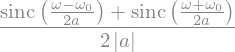

In [5]:
w0, a = sym.symbols('omega0 a')


class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)


y = rect(a*t) * sym.cos(w0*t)
W = 1/abs(a) * sym.sinc(w/(2*a))
X = sym.pi*(sym.DiracDelta(w + w0) + sym.DiracDelta(w - w0))

Y = 1/(2*sym.pi) * convolve(W, X, w)
Y

Both the signal and its Fourier transform are plotted for specific values $\omega_0$, $a$

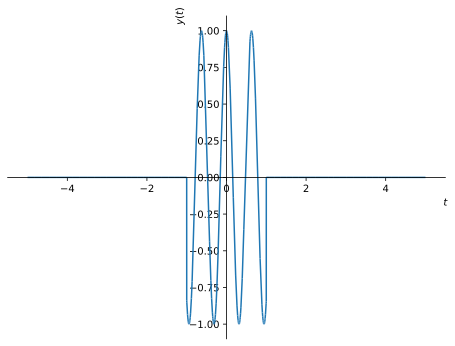

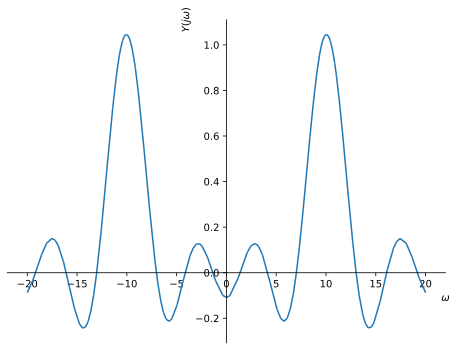

In [6]:
values = {w0: 10, a: 1/2}

sym.plot(y.subs(values), (t, -5, 5), xlabel=r'$t$', ylabel=r'$y(t)$')
sym.plot(Y.subs(values), (w, -20, 20),
         xlabel=r'$\omega$', ylabel=r'$Y(j \omega)$');

**Exercise**

* Change the length $1/a$ of the signal by modifying the substitution in the example. How does the Fourier transform change if you decrease or increase the length $1/a$?

* What happens if you change the angular frequency $\omega_0$ of the signal?

* Assume a signal that is composed from a superposition of two finite length cosine signals with different frequencies. What qualitative condition has to hold that you can derive these frequencies from the spectrum of the superposition?

### Modulation Theorem

The complex modulation of a signal $x(t)$ is defined as $e^{j \omega_0 t} \cdot x(t)$ with $\omega_0 \in \mathbb{R}$. Its Fourier transform can be derived by applying the multiplication theorem

\begin{equation}
\mathcal{F} \left\{ e^{j \omega_0 t} \cdot x(t) \right\} = \frac{1}{2 \pi} \cdot 2 \pi \cdot \delta(\omega - \omega_0) * X(j \omega) 
= X \big( j \, (\omega - \omega_0) \big)
\end{equation}

where $X(j \omega) = \mathcal{F} \{ x(t) \}$.  Above result states that the complex modulation of a signal leads to a shift of its spectrum. For $\omega_0 > 0$ the spectrum is shifted to higher frequencies. This lays the ground for wireless transmission of signals. Above result is known as modulation theorem.

**Example**

Lets assume a signal $x(t)$ which has a triangular spectrum $X(j \omega) = 2 \pi \cdot \Lambda(\omega)$. Due to the definition of the triangular function, the spectrum has only non-zero contributions for $|\omega| < 1$. Applying the duality principle to the [Fourier transform of $\Lambda(t)$ derived above](#Transformation-of-the-triangular-signal) yields the corresponding signal $x(t) = \mathcal{F}^{-1} \{ X(j \omega) \}$

\begin{equation}
x(t) = \text{sinc}^2 \left( \frac{t}{2} \right)
\end{equation}

Now lets consider the complex modulation $y(t) = e^{-j \omega_0 t} \cdot x(t)$ of the signal $x(t)$. The Fourier transform of the modulated signal is given as

\begin{equation}
\mathcal{F} \{ e^{j \omega_0 t} \cdot x(t) \} = 2 \pi \cdot \Lambda(\omega - \omega_0)
\end{equation}

The spectrum of the modulated signal has non-zero contributions for $\omega_0 -1 < \omega < \omega_0 + 1$. For large $\omega_0$ it only occupies a small part of the spectrum. This is an important property of signals used for wireless transmission. The signal $y(t)$ is defined

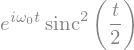

In [7]:
y = sym.exp(sym.I*w0*t) * sym.sinc(t/2)**2
y

and the real part of the complex modulated signal is plotted for illustration

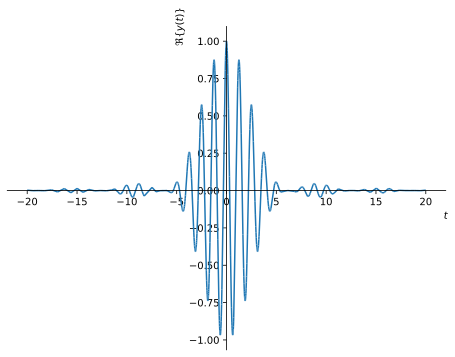

In [8]:
values = {w0: 5}
sym.plot(sym.re(y.subs(values)), (t, -20, 20),
         xlabel=r'$t$', ylabel=r'$\Re \{ y(t) \}$');

**Exercise**

* Derive the spectrum of the signal $x(t)$ modulated by $\cos(\omega_0 t)$. Hint: Express $\cos(\omega_0 t)$ by Euler's formula and exploit the linearity of the Fourier transform. What is different in the resulting spectrum when comparing to above result?

### Parseval's Theorem

[Parseval's theorem](https://en.wikipedia.org/wiki/Parseval's_theorem) relates the energy of a signal in the time domain to its spectrum. The squared absolute value of a signal $x(t)$ represents its instantaneous power. It can be expressed as

\begin{equation}
| x(t) |^2 = x(t) \cdot x^*(t)
\end{equation}

where $x^*(t)$ denotes the complex conjugate of $x(t)$. Fourier transformation of the right-hand side and application of the multiplication theorem results in

\begin{equation}
\mathcal{F} \{ x(t) \cdot x^*(t) \} = \frac{1}{2 \pi} \cdot X(j \omega) * X^*(-j \omega)
\end{equation}

Introducing the definition of the Fourier transform and the convolution

\begin{equation}
\int_{-\infty}^{\infty} x(t) \cdot x^*(t) \, e^{-j \omega t} \; dt =
\frac{1}{2 \pi} \int_{-\infty}^{\infty} X(j \eta) \cdot X^*(-j (\omega - \eta)) \, d\eta
\end{equation}

and setting $\omega = 0$ yields the desired relation

\begin{equation}
\int_{-\infty}^{\infty} | x(t) |^2 \; dt = \frac{1}{2 \pi} \int_{-\infty}^{\infty} | X(j \omega) |^2 \; d\omega
\end{equation}

The integral over the squared absolute signal in the time-domain is equal to the integral over its squared absolute spectrum divided by $2 \pi$. Since the left-hand side represents the energy $E$ of the signal $x(t)$, Parseval's theorem states that the energy can be computed either in the time or spectral domain by integrating over the squared absolute value of the signal/spectrum. Parseval's theorem can be generalized to the [Plancherel theorem](https://en.wikipedia.org/wiki/Plancherel_theorem) which considers the product of two signals $x(t) \cdot y^*(t)$.

**Example**

The energy of the rectangular signal $\text{rect}(t)$ is computed in the time and spectral domain by evaluation of the respective integrals. First the time domain is evaluated

\begin{equation}
E_t = \int_{-\infty}^{\infty} | \text{rect}(t) |^2 \; dt = \int_{- \frac{1}{2}}^{\frac{1}{2}} 1 \; dt
\end{equation}

In [9]:
E_t = sym.integrate(1, (t, -sym.S.Half, sym.S.Half))
E_t

The energy in the spectral domain is computed by evaluating

\begin{equation}
E_f = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \left| \text{sinc}\left(\frac{\omega}{2}\right) \right|^2 \; d\omega
\end{equation}

In [10]:
E_f = 1/(2*sym.pi) * sym.integrate(sym.sinc(w/2)**2, (w, -sym.oo, sym.oo))
E_f

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Continuous- and Discrete-Time Signals and Systems - Theory and Computational Examples*.